<a href="https://colab.research.google.com/github/hansglick/book_errata/blob/main/p019_RNN_overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

2.8.2


# Introduction

 * 3 types de RNN dans Tensorflow :    
   * `keras.layers.SimpleRNN` : un simple RNN
   * `keras.layers.GRU` : possède une cell ou deux
   * `keras.layers.LSTM` : possède une combo de cell avec mémoire
 * **Output d'un RNN** :
   * Par défaut, un RNN renvoie les états du dernier timestep du batch de séquences en input
   * Toutefois en précisant `return_sequences = True` on retourne l'état pour tout les timesteps, l'output est donc de shape `(batch,timesteps,units)`
   * A ce moment là, les hidden states sont recevables par une couche de RNN au dessus comme le montre l'exemple ci-dessous
 * **Output et States** :
   * On peut vouloir récupérer les hidden states en plus des outputs
   * Les LSTM ont deux hidden states
   * Les GRU et les RNN un seul
   * Le dernier state est apparemment accessible via l'attribut `.states`
 * **RNN Layer VS RNN Cell** :
   * Un RNN layer est responsable du traitement d'un lot de séquences. Or une RNN Celle est responsable du traitement d'un lot d'un même timestemp
   * On distingue 3 types de RNN Cells :    
     * `keras.layers.SimpleRNNCell`
     * `keras.layers.GRUCell`
     * `keras.layers.LSTMCell`
 * **Cross Batch StateFullness** :
   * Par défaut les hidden states sont réinitialisés à chaque nouveau batch. Si l'on souhaite traiter des séquences très longues voire infinies, on veut pouvoir propager ces hidden states aux batch d'après. On peut le faire via l'argument `stateful=True`
   * if a batch contains `[sequence_A_from_t0_to_t100, sequence_B_from_t0_to_t100]`, the next batch should contain `[sequence_A_from_t101_to_t200, sequence_B_from_t101_to_t200]`

 * **BiDirectionnal LSTM** :    
   * Avec un layer `tf.keras.layers.Bidirectional` on peut faire le traitement d'une séquence forward (classique) et backward. Les résultats sont ensuite concaténés dans un vecteur final par défaut.

### Shape de l'output

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=1000, output_dim=64))

model.add(tf.keras.layers.GRU(256, return_sequences=True))
# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)

# 256 units sont passés à chaque timestemp au RNN ci-dessous
model.add(tf.keras.layers.SimpleRNN(128))
# Output shape (batch,128), chaque timestemp est passé dans un réseau à 128 de sortie

model.add(tf.keras.layers.Dense(10))

### Output et Hidden States

In [ ]:
# Return states in addition to output
output, state_h, state_c = tf.keras.layers.LSTM(64, return_state=True, name="encoder")(encoder_embedded)
encoder_state = [state_h, state_c]

decoder_input = tf.keras.layers.Input(shape=(None,))
decoder_embedded = tf.keras.layers.Embedding(input_dim=decoder_vocab, output_dim=64)(
    decoder_input
)

# Pass the 2 states to a new LSTM layer, as initial state
decoder_output = tf.keras.layers.LSTM(64, name="decoder")(decoder_embedded, initial_state=encoder_state)

### Statefulness

In [ ]:
paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)

lstm_layer = tf.keras.layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)

existing_state = lstm_layer.states

new_lstm_layer = tf.keras.layers.LSTM(64)
new_output = new_lstm_layer(paragraph3, initial_state=existing_state)

In [ ]:
# rajouter un schéma d'une cellule rnn
# https://github.com/keras-team/keras/blob/v2.9.0/keras/layers/rnn/simple_rnn.py#L35-L238
# https://github.com/keras-team/keras/blob/v2.9.0/keras/layers/rnn/base_rnn.py#L35-L862

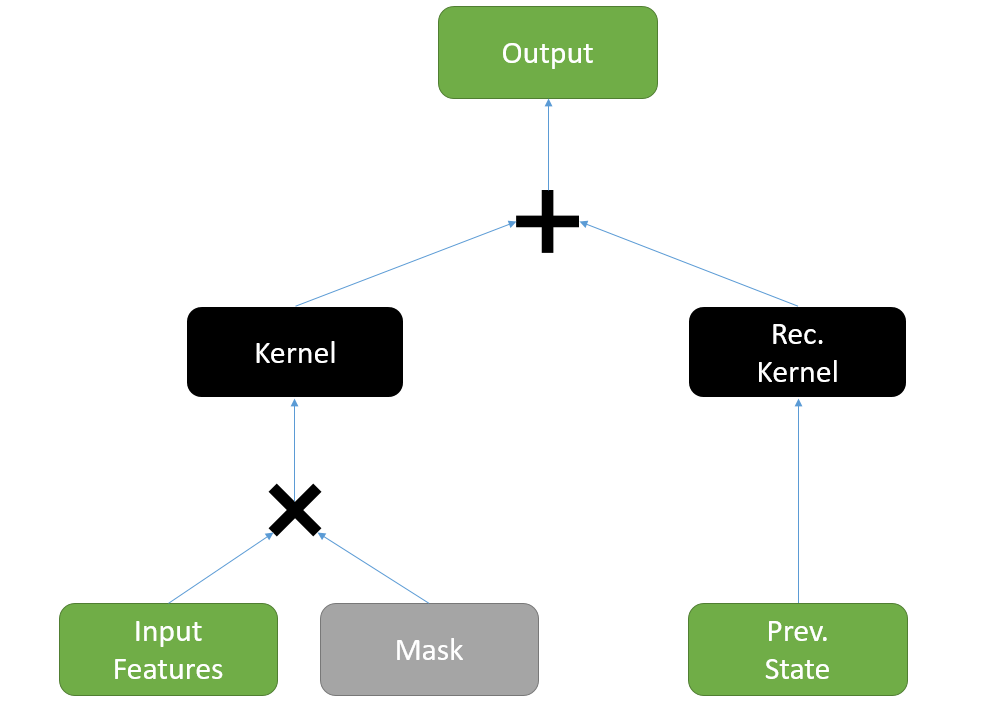